In [2]:
%matplotlib inline
import numpy
from astropy.io import fits
import h5py
from sys import  path
path.append("/home/hkli/work/mylib/")
import tool_box
from plot_tool import Image_Plot
import matplotlib.pyplot as plt

In [3]:
h5f = h5py.File("/mnt/ddnfs/data_users/hkli/CFHT/gg_lensing/data/redshift.hdf5","r")
red_refer = h5f["redshift"].value
dist_refer = h5f["distance"].value
h5f.close()

In [5]:
a = 1./(1+red_refer)
com_dist = 3000*dist_refer
dia_dist = com_dist*a

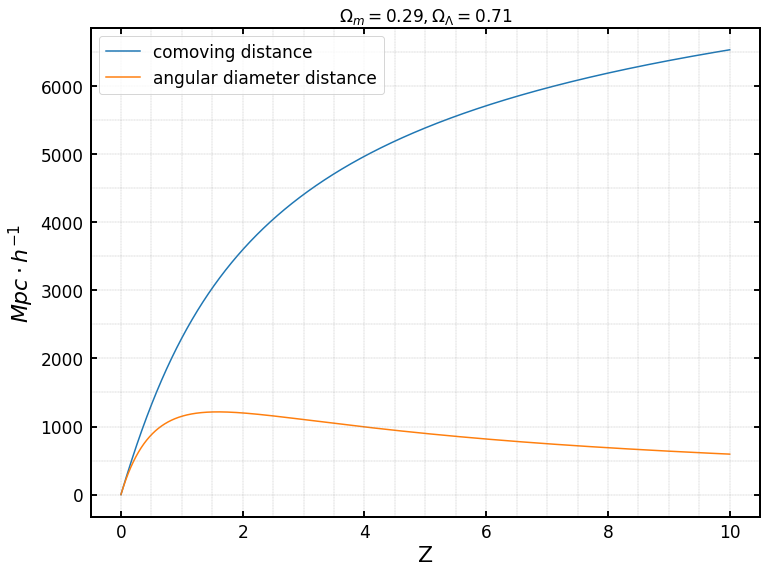

In [6]:
nx = 21
ny = 14

x = [i*0.5 for i in range(nx)]
y = [i*500 for i in range(ny)]

img = Image_Plot(fig_x=12,fig_y=9)
img.create_subfig(1,1)
img.axs[0][0].plot(red_refer,com_dist,label="comoving distance")
img.axs[0][0].plot(red_refer,dia_dist,label="angular diameter distance")
img.tick_label(0,0,1,"Z")
img.tick_label(0,0,0,"$Mpc \cdot h^{-1}$")
img.axs[0][0].set_title("$\Omega_m = 0.29, \Omega_\Lambda=0.71$",fontsize=img.legend_size)
ys = img.axs[0][0].set_ylim()
xs = img.axs[0][0].set_xlim()

for i in range(ny):
    img.axs[0][0].plot([xs[0],xs[1]], [y[i], y[i]], c="grey",linestyle="--",alpha=0.9,linewidth=0.3)
for i in range(nx):
    img.axs[0][0].plot([x[i], x[i]], [ys[0], ys[1]], c="grey", linestyle="--" ,alpha=0.9, linewidth=0.3)
    
img.axs[0][0].legend(fontsize=img.legend_size)

[ 0.19041988]
[ 0.3] 0.3 [ 0.27828061]
[ 0.331] 0.331034482759 [ 0.30452063]
[ 0.3621] 0.362068965517 [ 0.33037573]
[ 0.3931] 0.393103448276 [ 0.35568344]
[ 0.4241] 0.424137931034 [ 0.38053211]
[ 0.4552] 0.455172413793 [ 0.40500475]
[ 0.4862] 0.486206896552 [ 0.42894963]
[ 0.5172] 0.51724137931 [ 0.45245222]
[ 0.5483] 0.548275862069 [ 0.4755927]
[ 0.5793] 0.579310344828 [ 0.49822912]
[ 0.6103] 0.610344827586 [ 0.52044369]
[ 0.6414] 0.641379310345 [ 0.54231342]
[ 0.6724] 0.672413793103 [ 0.56370525]
[ 0.7034] 0.703448275862 [ 0.58469787]
[ 0.7345] 0.734482758621 [ 0.6053649]
[ 0.7655] 0.765517241379 [ 0.62558136]
[ 0.7966] 0.796551724138 [ 0.64548564]
[ 0.8276] 0.827586206897 [ 0.66495771]
[ 0.8586] 0.858620689655 [ 0.6840701]
[ 0.8897] 0.889655172414 [ 0.70289067]
[ 0.9207] 0.920689655172 [ 0.72130623]
[ 0.9517] 0.951724137931 [ 0.73938565]
[ 0.9828] 0.98275862069 [ 0.75719332]
[ 1.0138] 1.01379310345 [ 0.77462235]
[ 1.0448] 1.04482758621 [ 0.79173797]
[ 1.0759] 1.07586206897 [ 0.80860

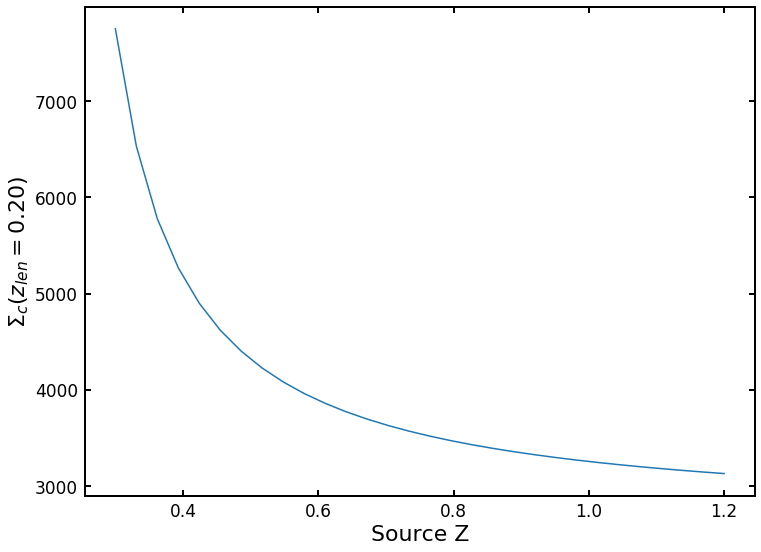

In [17]:
z1 = 0.2
z_num = 30
z2 = numpy.linspace(z1+0.1, z1+1,z_num)
tag = tool_box.find_near(red_refer, z1)
dist_1 = dist_refer[tag]
print(dist_1)
sigma_crit = []
for i in range(z_num):
    tag = tool_box.find_near(red_refer, z2[i])
    dist_2 = dist_refer[tag]
    print(red_refer[tag], z2[i], dist_refer[tag])
    sigma_crit.append(388.283351*dist_2/dist_1/(dist_2-dist_1)*(1+z1))
    
img = Image_Plot(fig_x=12,fig_y=9)
img.create_subfig(1,1)
img.axs[0][0].plot(z2, sigma_crit)

img.tick_label(0,0,0,"$\Sigma_c(z_{len}=%.2f)$"%z1)
img.tick_label(0,0,1,"Source Z")
img.show_img()